<a href="https://colab.research.google.com/github/SuhaibIrsheidat/Handwritten-Digits-Recognition/blob/master/HANDWRITTEN_DIGITS_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import required libraries
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np 
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense
from keras.layers import Activation, Dropout, Flatten
from keras.optimizers import RMSprop
from keras.utils import to_categorical
from keras.models import load_model
# -------------------------------------------------------- #
# Load data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Split data
X_train, Y_train= mnist.train.images, mnist.train.labels
X_test, Y_test = mnist.test.images, mnist.test.labels
X_valid, Y_valid = mnist.validation.images, mnist.validation.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
# (1) Convert to numpy format
# (2) Reshape into (?, 28, 28, 1)
X_train = np.array(list(map(lambda x: x.reshape((28,28, 1)), X_train)))
X_test = np.array(list(map(lambda x: x.reshape((28,28, 1)), X_test)))
X_valid = np.array(list(map(lambda x: x.reshape((28,28, 1)), X_valid)))

In [0]:
# Constructing model
model = Sequential()
# First block
model.add(Conv2D(16, (5, 5), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5, 5)))
# Second block
model.add(Conv2D(32, (5, 5)))
model.add(Activation('relu'))
model.add(Dropout(0.25))
# Final block
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# Regression block
model.add(Dense(10))
model.add(Activation('softmax'))
# Finilize components
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])
# Start Training
model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test), shuffle=True)
# Save weights
model.save("HANDWRITTEN_DIGITS.h5")

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 27s 496us/step - loss: 0.4100 - acc: 0.8644 - val_loss: 0.1013 - val_acc: 0.9671
Epoch 2/10
55000/55000 [==============================] - 26s 477us/step - loss: 0.1665 - acc: 0.9483 - val_loss: 0.0711 - val_acc: 0.9762
Epoch 3/10
55000/55000 [==============================] - 27s 486us/step - loss: 0.1296 - acc: 0.9606 - val_loss: 0.0605 - val_acc: 0.9807
Epoch 4/10
55000/55000 [==============================] - 26s 478us/step - loss: 0.1092 - acc: 0.9665 - val_loss: 0.0581 - val_acc: 0.9815
Epoch 5/10
55000/55000 [==============================] - 27s 487us/step - loss: 0.1023 - acc: 0.9686 - val_loss: 0.0480 - val_acc: 0.9840
Epoch 6/10
55000/55000 [==============================] - 26s 480us/step - loss: 0.0932 - acc: 0.9717 - val_loss: 0.0472 - val_acc: 0.9844
Epoch 7/10
55000/55000 [==============================] - 26s 480us/step - loss: 0.0876 - acc: 0.9733 - val_loss: 0.

In [0]:
# Load the model
new_model = load_model("HANDWRITTEN_DIGITS.h5")
# Evaluate the model over data that never seen
print('='*50)
print('>> Evaluate on validation data: (WHICH NEVER SEEN)')
results = new_model.evaluate(X_valid, Y_valid, batch_size=128)
print('Accuracy: %0.4f%%' % (results[1]*100))
print('Loss: %0.4f%%' % (results[0]*100))
print('='*50)

>> Evaluate on validation data: (WHICH NEVER SEEN)
5000/5000 [==============================] - 1s 295us/step
Accuracy: 98.6200%
Loss: 5.1526%


In [0]:
# Print model summary
print(new_model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
activation_9 (Activation)    (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 1, 32)          12832     
_________________________________________________________________
activation_10 (Activation)   (None, 1, 1, 32)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32)               

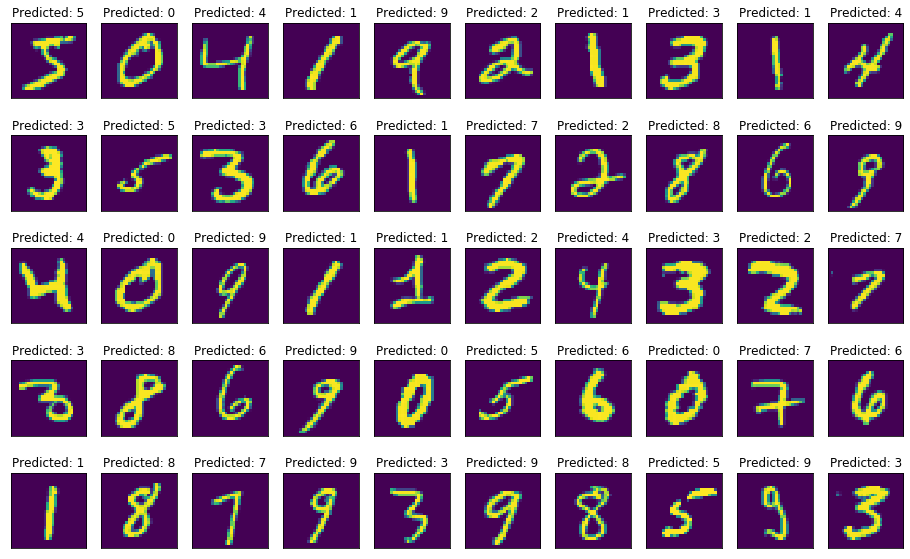

In [0]:
# Predict the classes of the validation set
predictions = new_model.predict_classes(X_valid)
# Get original images in order to show them
new_Valid = mnist.validation.images
# Initialize figure
fig = plt.figure(figsize=(16,10))
# Loop over 50 images and show them along side predicted class
for x in range (50):
    y = fig.add_subplot(5, 10, x+1)
    img = new_Valid[x].reshape((28,28))
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    plt.imshow(img)
    plt.title("Predicted: " + str(predictions[x]))
plt.show()